 # 4. The Fundamental Theorem of the Integral Calculus

In [1]:
from spb import plot
from spb.defaults import cfg
from sympy import (
    And,
    cos,
    Derivative,
    diff,
    Eq,
    Function,
    Integral,
    integrate,
    log,
    pi,
    sin,
    Symbol,
    symbols
)

cfg["matplotlib"]["show_minor_grid"] = True

In [2]:
f = Function('f')
a, b, t = symbols('a, b, t')
int_1 = Integral(f(t), (t, a, b))

F = Function('F')

Eq(
    int_1,
    F(b) - F(a)
)

Eq(Integral(f(t), (t, a, b)), -F(a) + F(b))

In [3]:
fun_1 = (1 - t**2)**(1/2)
fun_1

(1 - t**2)**0.5

In [4]:
int_2 = Integral(fun_1, (t, a, b))
int_2

Integral((1 - t**2)**0.5, (t, a, b))

In [5]:
int_2.doit()

-1.0*a*hyper((-0.5, 1/2), (3/2,), a**2*exp_polar(2*I*pi)) + 1.0*b*hyper((-0.5, 1/2), (3/2,), b**2*exp_polar(2*I*pi))

In [6]:
int_2.subs({a: 0, b: 1})

Integral((1 - t**2)**0.5, (t, 0, 1))

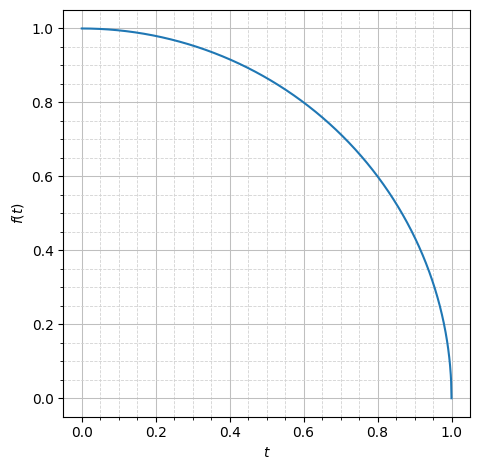

In [7]:
plot(fun_1, (t, 0, 1), aspect='equal')

In [8]:
theta = Symbol('θ')

diff(sin(theta))

cos(θ)

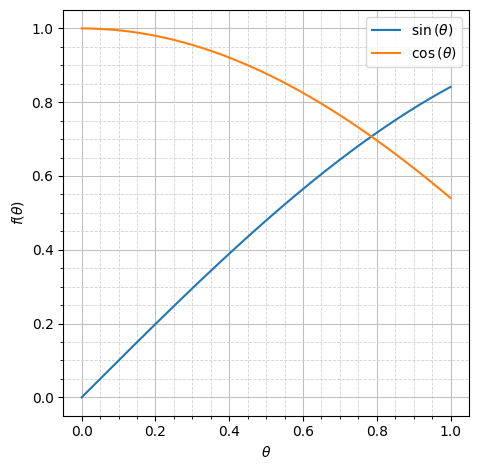

In [9]:
plot(
    sin(theta),
    cos(theta),
    (theta, 0, 1),
    aspect='equal'
)

In [10]:
fun_2 = (1 - (sin(theta)**2))**(1/2)*cos(theta)
fun_2

(1 - sin(θ)**2)**0.5*cos(θ)

In [11]:
alpha, beta = symbols('α, β')
int_3 = Integral(fun_2, (theta, alpha, beta))
int_3

Integral((1 - sin(θ)**2)**0.5*cos(θ), (θ, α, β))

In [12]:
fun_3 = cos(theta)**2
fun_3

cos(θ)**2

In [13]:
int_4 = Integral(fun_3, (theta, alpha, beta))
int_4

Integral(cos(θ)**2, (θ, α, β))

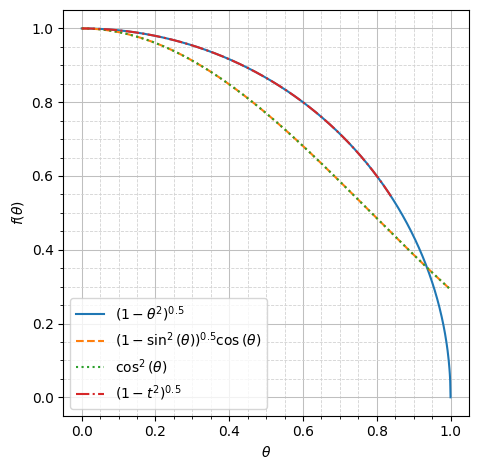

In [14]:
p1 = plot(
    fun_1,
    (t, sin(0), sin(1)),
    rendering_kw=[{'linestyle': '-.'}],
    aspect='equal',
    show=False
)

p2 = plot(
    fun_1.subs(t, theta),
    fun_2,
    fun_3,
    (theta, 0, 1),
    rendering_kw=[
        {'linestyle': '-'},
        {'linestyle': '--'},
        {'linestyle': ':'}
    ],
    aspect='equal',
    show=False
)

(p2 + p1).show()

In [15]:
And(
    Eq(
        int_2.subs({a: sin(0), b: sin(1)}).n(),
        int_3.subs({alpha: 0, beta: 1}).n()
    ),
    Eq(
        int_3.subs({alpha: 0, beta: 1}).n(),
        int_4.subs({alpha: 0, beta: 1}).n()
    )
)

True

In [16]:
Eq(
    diff(sin(theta) * cos(theta)),
    2 * cos(theta)**2 - 1
).simplify()

True

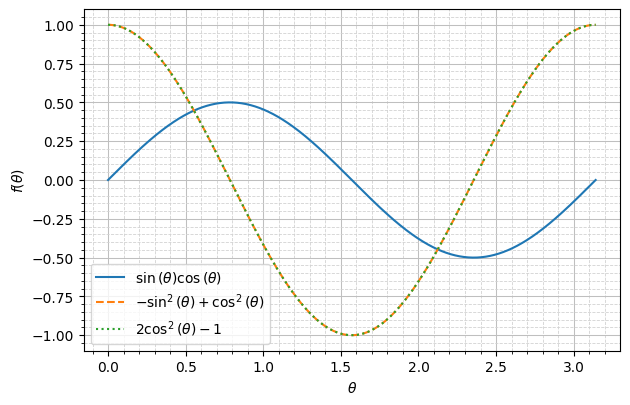

In [17]:
plot(
    sin(theta) * cos(theta),
    diff(sin(theta) * cos(theta)),
    2 * cos(theta)**2 - 1,
    (theta, 0, pi),
    rendering_kw=[{}, {'linestyle': '--'}, {'linestyle': ':'}],
    aspect='equal'
)

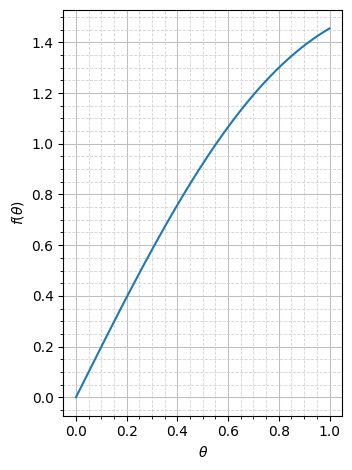

In [18]:
fun_4 = theta + (sin(theta) * cos(theta))

plot(fun_4, (theta, 0, 1), aspect='equal')

In [19]:
fun_5 = (1/2) * (fun_4.subs(theta, beta) - fun_4.subs(theta, alpha))
eq_1 = Eq(int_4, fun_5)
eq_1

Eq(Integral(cos(θ)**2, (θ, α, β)), -0.5*α + 0.5*β - 0.5*sin(α)*cos(α) + 0.5*sin(β)*cos(β))

In [20]:
eq_1.subs({alpha: 0, beta: 1}).simplify()

Eq(Integral(cos(θ)**2, (θ, 0, 1)), 0.25*sin(2) + 0.5)

In [21]:
Eq(
    int_4.subs({alpha: 0, beta: 1}).n(),
    fun_5.subs({alpha: 0, beta: 1}).n()
)

True

In [22]:
Eq(
    int_2.subs({a: 0, b: 1}).n(),
    (pi/4).n()
)

True

In [23]:
Eq(
    int_4.subs({alpha: 0, beta: pi/2}).n(),
    (pi/4).n()
)

True

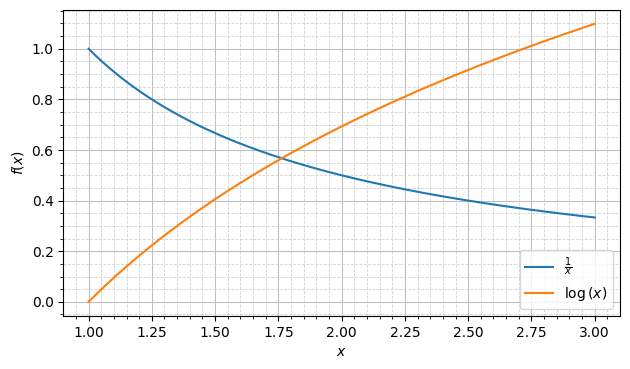

In [24]:
x = Symbol('x')

plot(
    1/x,
    log(x),
    (x, 1, 3),
    aspect='equal'
)

 **Lemma A**
 If a continuous function *F(t)*, defined for all *t* with *a* <= *t* <= *b*, has a derivative 0 for every such *t*, then *F(t)* is constant for all *t* with *a* <= *t* <= *b*

In [25]:
class F(Function):
    @classmethod
    def eval(cls, n):
        return n-n

F(t)

0

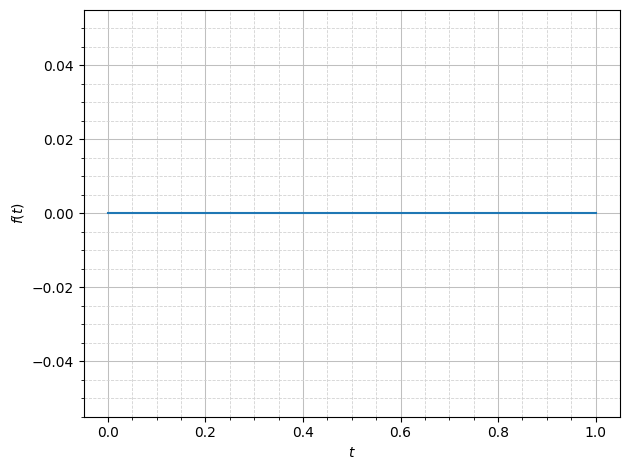

In [26]:
plot(
    diff(F(t), t),
    (t, 0, 1)
)

 **Lemma B**
 If the function *f(t)* is bounded between two constants *m* and *M*, so that *m* <= *f(t)* <= *M* for all *t* with *a* <= *t* <= *b*, then the definite integral of *f(t)* satisfies the inequalities

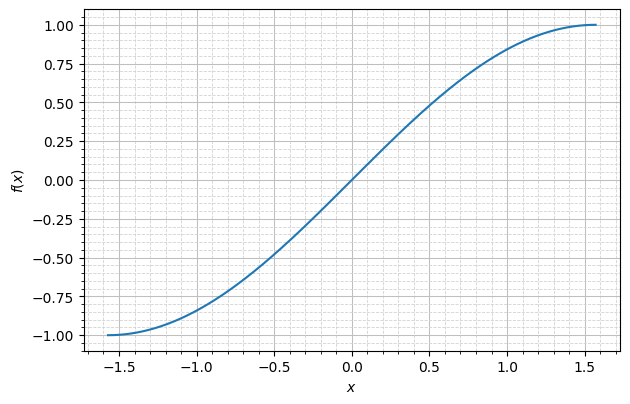

In [27]:
m, M = symbols('m, M')

class f(Function):
    @classmethod
    def eval(cls, n):
        return sin(n)

plot(f(x), (x, -pi/2, pi/2), aspect='equal')

In [28]:
ine_1 = (b - a) * m <= integrate(f(t), (t, a, b))
ine_1

m*(-a + b) <= cos(a) - cos(b)

In [29]:
ine_1.subs({a: -(pi/2), b: pi/2, m: sin(-(pi/2))})

True

In [30]:
ine_2 = integrate(f(t), (t, a, b)) <= (b - a) * M
ine_2

cos(a) - cos(b) <= M*(-a + b)

In [31]:
ine_2.subs({a: -(pi/2), b: pi/2, M: sin(pi/2)})

True

In [32]:
((b - a) * m).subs({a: -(pi/2), b: pi/2, m: sin(-(pi/2))})

-pi

In [33]:
((b - a) * M).subs({a: -(pi/2), b: pi/2, M: sin(pi/2)})

pi

In [34]:
class G(Function):
    @classmethod
    def eval(cls, t):
        return integrate(f(x), (x, a, t))

G(t)

cos(a) - cos(t)

In [35]:
h = Symbol('h')

ine_2 = h*m <= G(t+h) - G(t)
ine_2

h*m <= cos(t) - cos(h + t)

In [36]:
ine_2.subs({h: 1e-1, m: sin(1), t: 1})

True

In [37]:
Eq(
    G(t+h) - G(t),
    integrate(f(x), (x, t, t+h))
)

True

In [38]:
ine_3 = integrate(f(x), (x, t, t+h)) <= h*M
ine_3

cos(t) - cos(h + t) <= M*h

In [39]:
ine_3.subs({h: 1e-1, M: sin(1+1e-1), t: 1})

True

In [40]:
Eq(
    diff(G(t), t),
    f(t),
    evaluate=False
)

Eq(sin(t), sin(t))

In [41]:
G(a).subs({a: 0, b: 1})

0

In [42]:
anti_der = (integrate(f(b), b) - integrate(f(a), a))
anti_der

cos(a) - cos(b)

In [43]:
anti_der.subs({a: 0, b: 1})

1 - cos(1)

In [44]:
G(b).subs({a: 0, b: 1})

1 - cos(1)

In [45]:
Eq(G(b), anti_der)

True